In [9]:
import numpy as np
import os
import pickle
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets, transforms

In [11]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/cifar-10-batches-py'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Μετασχηματισμός των δεδομένων
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [13]:
train_dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
classesToUse = [1, 9]

In [15]:
x_train = torch.stack([train_dataset[i][0] for i in range(len(train_dataset))]).numpy()
y_train = np.array([train_dataset[i][1] for i in range(len(train_dataset))])

x_test = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))]).numpy()
y_test = np.array([test_dataset[i][1] for i in range(len(test_dataset))])

# Επιλογή μόνο των δεδομένων για τις δύο κλάσεις
train_idx = np.isin(y_train, classesToUse)
test_idx = np.isin(y_test, classesToUse)

x_train = x_train[train_idx]
y_train = y_train[train_idx]
x_test = x_test[test_idx]
y_test = y_test[test_idx]

# Ανάπτυξη των δεδομένων για χρήση σε SVM (σε μορφή 1D vector ανά εικόνα)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [17]:
pca = PCA(n_components=0.90)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [18]:
gamma_values = ['scale',0.01, 0.1, 1, 5, 10]
C_values = [0.1, 0.5, 1, 3,5, 10]

In [19]:
results=[]

In [ ]:
for C in C_values:
    print(f"SVM για C={C}")
    svm = SVC(kernel='linear', gamma=1, C=C)
    svm.fit(x_train_pca, y_train)
    y_pred_train = svm.predict(x_train_pca)
    y_pred_test = svm.predict(x_test_pca)
    train_accuracy = accuracy_score(y_train, y_pred_train) * 100
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100
    print(f"Train Accuracy: {train_accuracy:.2f} , Test Accuracy: {test_accuracy:.2f}")

SVM για C=0.1
Train Accuracy: 82.98 , Test Accuracy: 84.05
SVM για C=0.5
Train Accuracy: 82.99 , Test Accuracy: 84.00
SVM για C=1


In [20]:
for C in C_values:
    print(f"SVM για C={C}")
    for gamma in gamma_values:
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(x_train_pca, y_train)
        y_pred_train = svm.predict(x_train_pca)
        y_pred_test = svm.predict(x_test_pca)
        train_accuracy = accuracy_score(y_train, y_pred_train) * 100
        test_accuracy = accuracy_score(y_test, y_pred_test) * 100
        print(f"gamma={gamma}, Train Accuracy: {train_accuracy:.2f} , Test Accuracy: {test_accuracy:.2f}")

SVM για C=0.1
gamma=scale, Train Accuracy: 74.95 , Test Accuracy: 72.50
gamma=0.01, Train Accuracy: 100.00 , Test Accuracy: 50.65
gamma=0.1, Train Accuracy: 100.00 , Test Accuracy: 50.05
gamma=1, Train Accuracy: 100.00 , Test Accuracy: 52.65


KeyboardInterrupt: 

In [ ]:
degree_values = [0.1 , 0.6 ,1 ,2, 3, 4, 10]

In [15]:
for C in C_values:
    print(f"SVM poly για C={C}")
    for d in degree_values:
        print(f"SVM για d={d}")
        svm = SVC(kernel='poly', gamma=1, C=C ,degree=d )
        svm.fit(x_train_pca, y_train)
        y_pred_train = svm.predict(x_train_pca)
        y_pred_test = svm.predict(x_test_pca)
        train_accuracy = accuracy_score(y_train, y_pred_train) * 100
        test_accuracy = accuracy_score(y_test, y_pred_test) * 100
        print(f"gamma={gamma}, Train Accuracy: {train_accuracy:.2f} , Test Accuracy: {test_accuracy:.2f}")

SVM poly για C=0.1
SVM για d=0.1


InvalidParameterError: The 'degree' parameter of SVC must be an int in the range [0, inf). Got 0.1 instead.

In [1]:
for C in C_values:
    print(f"SVM για C={C}")
    for gamma in gamma_values:
        svm = SVC(kernel='linear', gamma=gamma, C=C)
        svm.fit(x_train_pca, y_train)
        y_pred_train = svm.predict(x_train_pca)
        y_pred_test = svm.predict(x_test_pca)
        train_accuracy = accuracy_score(y_train, y_pred_train) * 100
        test_accuracy = accuracy_score(y_test, y_pred_test) * 100

        print(f"gamma={gamma}, Train Accuracy: {train_accuracy:.2f} , Test Accuracy: {test_accuracy:.2f}")

NameError: name 'C_values' is not defined

In [135]:
svm = SVC(kernel='linear', gamma=0.1, C=0.1)
svm.fit(x_train_pca, y_trlain)

KeyboardInterrupt: 

In [111]:
y_pred_train = svm.predict(x_train_pca)
y_pred_test = svm.predict(x_test_pca)

In [112]:
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

In [113]:
print(f"Ακρίβεια εκπαίδευσης: {train_accuracy:.2f}%")
print(f"Ακρίβεια δοκιμής: {test_accuracy:.2f}%")

Ακρίβεια εκπαίδευσης: 95.17%
Ακρίβεια δοκιμής: 92.10%


In [114]:
correct_idx = np.where(y_pred_test == y_test)[0]
incorrect_idx = np.where(y_pred_test != y_test)[0]

In [115]:
print(f"Αριθμός σωστών ταξινομήσεων: {len(correct_idx)}")
print(f"Αριθμός λανθασμένων ταξινομήσεων: {len(incorrect_idx)}")

Αριθμός σωστών ταξινομήσεων: 1842
Αριθμός λανθασμένων ταξινομήσεων: 158


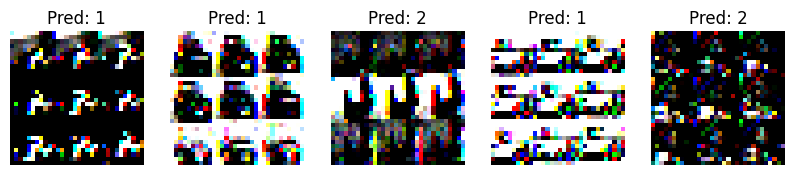

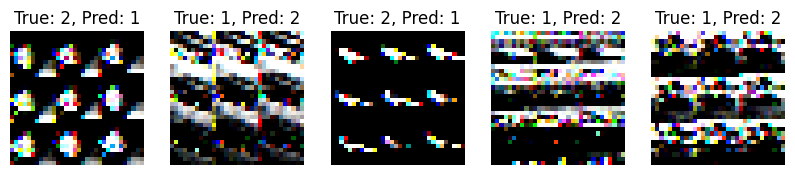

In [29]:
# Προβολή εικόνας από τις σωστές και λανθασμένες ταξινομήσεις
# Σωστές ταξινομήσεις
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_idx[:5]):  # Εμφάνιση 5 πρώτων σωστών εικόνων
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Pred: {y_pred_test[idx]}")
    plt.axis('off')
plt.show()

# Λανθασμένες ταξινομήσεις
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_idx[:5]):  # Εμφάνιση 5 πρώτων λανθασμένων εικόνων
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_test[idx]}")
    plt.axis('off')
plt.show()